In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


point_list = []
count = 0

In [18]:
# 4개의 점을 지정해주는 함수
def mouse_callback(event, x, y, flags, param):
    global point_list, count, img_original

    # 마우스 왼쪽 버튼 누를 때마다 좌표를 리스트에 저장
    if event == cv2.EVENT_LBUTTONDOWN: # 마우스 왼쪽이 눌러지면 실행
        print("(%d, %d)" % (x, y))
        point_list.append((x, y))

        print(point_list)
        cv2.circle(img_original, (x, y), 3, (0, 0, 255), -1) # 지정된점을 빨간색 원으로 나타내줌


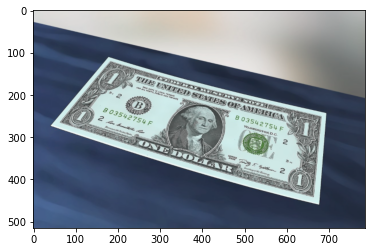

In [20]:

cv2.namedWindow('original') # original윈도우창을 띄움

# 마우스 입력, namedWIndow or imshow가 실행되어 창이 떠있는 상태에서만 사용가능
# 마우스 이벤트가 발생하면 mouse_callback 함수 실행
cv2.setMouseCallback('original', mouse_callback)

# 원본 이미지를 불러옴
img_original = cv2.imread('dallor.png')
plt.imshow(img_original)

In [21]:
while(True):

    cv2.imshow("original", img_original) # original윈도우창에 원본이미지를 불러옴


    height, width = img_original.shape[:2] # img_original의 height, width를 지정


    if cv2.waitKey(1)&0xFF == 32: # spacebar를 누르면 루프에서 빠져나옴
        break

(173, 116)
[(173, 116)]
(48, 273)
[(173, 116), (48, 273)]
(699, 243)
[(173, 116), (48, 273), (699, 243)]
(682, 457)
[(173, 116), (48, 273), (699, 243), (682, 457)]


In [22]:
# 좌표 순서 - 상단왼쪽 끝, 상단오른쪽 끝, 하단왼쪽 끝, 하단오른쪽 끝
pts1 = np.float32([list(point_list[0]),list(point_list[1]),list(point_list[2]),list(point_list[3])])
pts2 = np.float32([[0,0],[width,0],[0,height],[width,height]])

print(pts1)
print(pts2)


[[173. 116.]
 [ 48. 273.]
 [699. 243.]
 [682. 457.]]
[[  0.   0.]
 [786.   0.]
 [  0. 515.]
 [786. 515.]]


In [23]:
# 점 4개의 이동 전, 이동 후 좌표를 입력하면 투시 변환 행렬을 반환하는 함수
# pts1 : 4개의 원본 좌표점
# pts2 : 4개의 결과 좌표점 
M = cv2.getPerspectiveTransform(pts1,pts2)

# 투시 변환 함수에 투시 변환 행렬을 입력하면 투시 변환 행렬이 적용된 영항을 출력
# img_original : 입력 영상
# M : 투시 변환 행렬
# (width,height) : 결과 영상 크기
img_result = cv2.warpPerspective(img_original, M, (width,height))

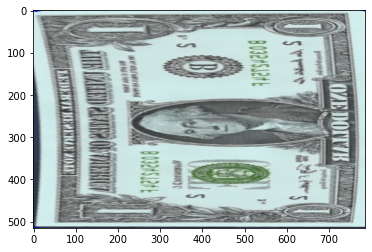

In [24]:
cv2.imshow("result1", img_result) # result1윈도우창에 결과이미지를 불러옴
cv2.waitKey(0)
cv2.destroyAllWindows() 
plt.imshow(img_result)